## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x = np.random.uniform(0, 20, 20)
x

array([ 8.84924002,  5.18953128,  9.11983384,  5.41852105, 12.8526106 ,
        7.99554665,  0.70390245,  1.31046236, 19.53863751, 11.82788185,
        9.41705706, 14.17708569,  1.86909478,  4.61529616,  1.9424198 ,
       18.20664677,  3.93603925,  9.97688969, 16.73898835,  3.39834469])

In [3]:
y = -2*x+1
y

array([-16.69848005,  -9.37906256, -17.23966769,  -9.83704209,
       -24.70522121, -14.9910933 ,  -0.40780491,  -1.62092473,
       -38.07727501, -22.6557637 , -17.83411411, -27.35417138,
        -2.73818956,  -8.23059231,  -2.8848396 , -35.41329353,
        -6.87207849, -18.95377937, -32.4779767 ,  -5.79668937])

#### Plot your data points. 

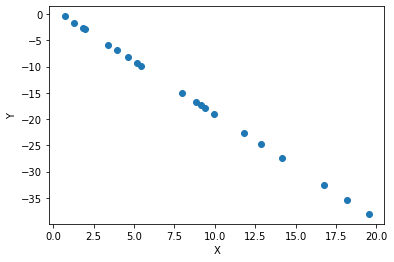

In [4]:
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

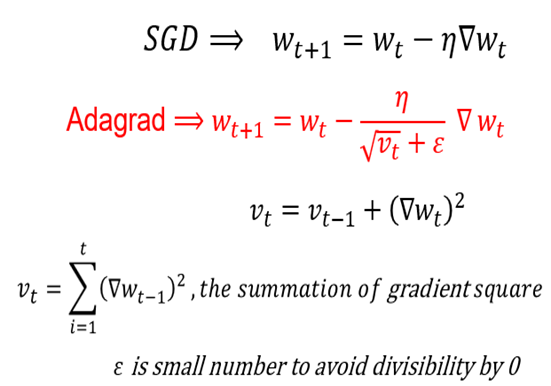

In [5]:
def batch_adgard(x,y,a=0.01,iteration = 1000):
    alpha = a
    epslon = 0.00000001
    t0 = 0
    t1 = 0 
    v0 = 0
    v1 = 0
    loss_f = []
    t0_list = []
    t1_list = []
    h_list = []
    for i in range(iteration):
        h = t0 + t1 *x
        h_list.append(h)
        cost_f = (sum((h-y)**2)/(2*len(x)))
        loss_f.append(cost_f)
        G0 = 1/len(x) * sum((h-y))
        G1 = sum((h-y)*x)/len(x)
        v0 = v0 + G0**2
        v1 = v1 + G1**2
        t0 = t0 - ((alpha/((v0**(1/2))+epslon))*G0)
        t0_list.append(t0)
        t1 = t1 - ((alpha/((v1**(1/2))+epslon))*G1)
        t1_list.append(t1)
        
    return h,t0,t1,t0_list,t1_list,loss_f,h_list


In [6]:
h,t0,t1,t0_list,t1_list,loss_f,h_list = batch_adgard(x,y,a=0.1,iteration = 1000)

In [7]:
def R2(y,h):
    ymean = np.mean(y)
    ssres = sum((y-h)**2)
    sstot = sum((y-ymean)**2)
    r2 = 1-(ssres/sstot)
    return r2
R2(y,h)

0.9903991492081637

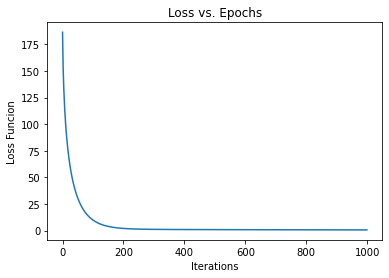

In [8]:
def loss_plot(loss_f): 
    plt.plot(loss_f)
    plt.xlabel("Iterations")
    plt.ylabel("Loss Funcion")
    plt.title("Loss vs. Epochs")
    plt.show()
    
loss_plot(loss_f)

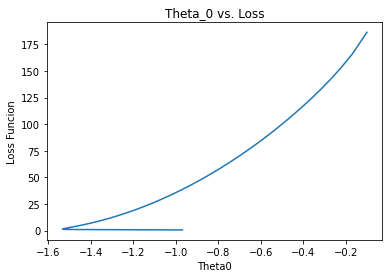

In [9]:
def t0_plot(t0_list,loss_f):    
    plt.plot(t0_list,loss_f)
    plt.xlabel("Theta0")
    plt.ylabel("Loss Funcion")
    plt.title("Theta_0 vs. Loss")
    plt.show()
    
t0_plot(t0_list,loss_f)

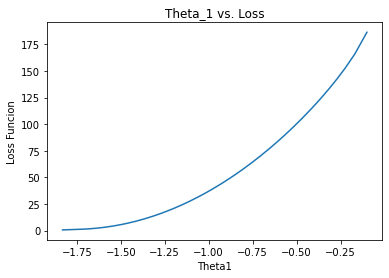

In [10]:
def t1_plot(t1_list,loss_f):
    plt.plot(t1_list,loss_f)
    plt.xlabel("Theta1")
    plt.ylabel("Loss Funcion")
    plt.title("Theta_1 vs. Loss")
    plt.show()
    
t1_plot(t1_list,loss_f)

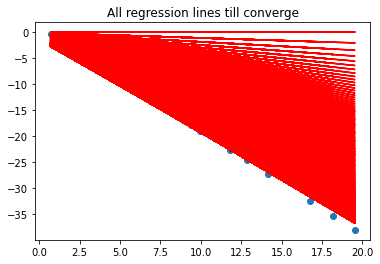

In [11]:
def hlist_plot(x,h_list):    
    plt.scatter(x,y,label='Orignal data')
    for i in range(0,len(h_list)):
        plt.plot(x,h_list[i],color='red',label='Model')
    plt.title("All regression lines till converge")
    plt.show()
    
hlist_plot(x,h_list)

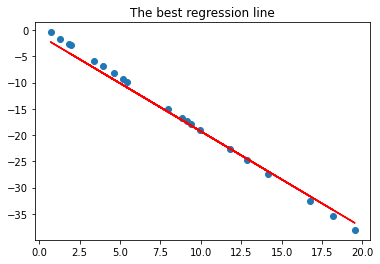

In [12]:
def besth(x,y,h):
    plt.scatter(x,y,label='Orignal data')
    plt.plot(x,h,color='red',label='Model')
    plt.title("The best regression line")
    plt.show()
    
besth(x,y,h)

# When Iteration = 10000

In [13]:
h,t0,t1,t0_list,t1_list,loss_f,h_list = batch_adgard(x,y,a=0.1,iteration = 10000)

In [14]:
R2(y,h)

0.9999858300227643

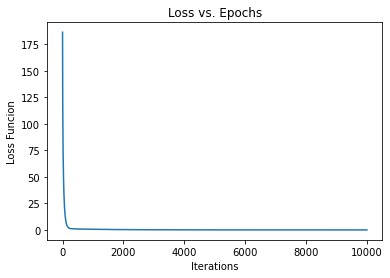

In [15]:
loss_plot(loss_f)

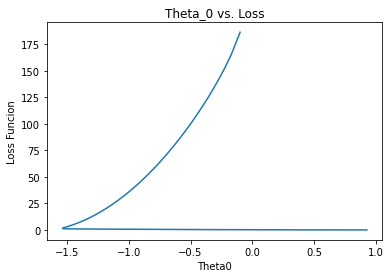

In [16]:
t0_plot(t0_list,loss_f)

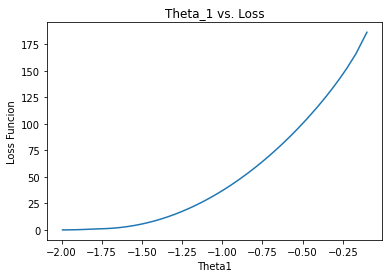

In [17]:
t1_plot(t1_list,loss_f)

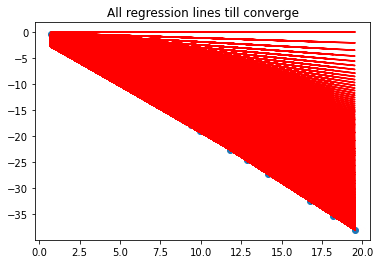

In [18]:
hlist_plot(x,h_list)

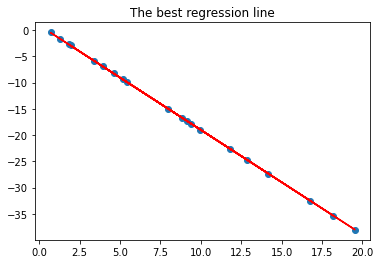

In [19]:
besth(x,y,h)

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

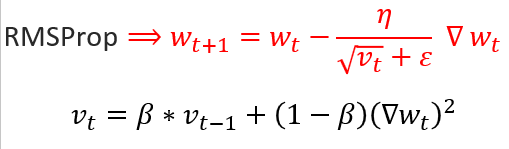

In [20]:
def batch_Rms(x,y,beta,a=0.01,iteration = 1000):
    alpha = a
    epslon = 0.00000001
    t0 = 0
    t1 = 0 
    v0=0
    v1=0
    loss_f = []
    t0_list = []
    t1_list = []
    h_list = []
    
    for i in range(iteration):
        h = t0 + t1 *x
        h_list.append(h)
        cost_f = (sum((h-y)**2)/(2*len(x)))
        loss_f.append(cost_f)
        G0 = 1/len(x) * sum((h-y))
        G1 = sum((h-y)*x)/len(x)
        v0 = beta*v0 + (1-beta)*(G0**2)
        v1 = beta*v1 + (1-beta)*(G1**2)
        t0 = t0 - ((alpha/((v0**(1/2))+epslon))*G0)
        t0_list.append(t0)
        t1 = t1 - ((alpha/((v1**(1/2))+epslon))*G1)
        t1_list.append(t1)
        
    return h,t0,t1,t0_list,t1_list,loss_f,h_list


In [21]:
h,t0,t1,t0_list,t1_list,loss_f,h_list = batch_Rms(x,y,0.9,a=0.01,iteration = 1000)

In [22]:
R2(y,h)

0.9999764271719191

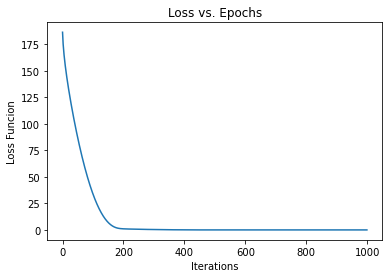

In [23]:
loss_plot(loss_f)

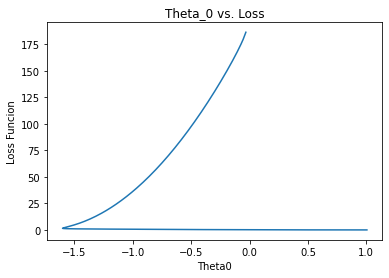

In [24]:
t0_plot(t0_list,loss_f)

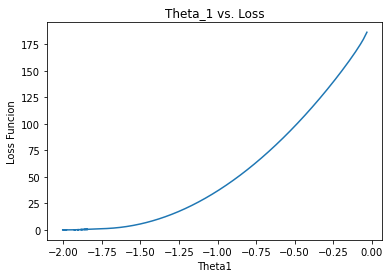

In [25]:
t1_plot(t1_list,loss_f)

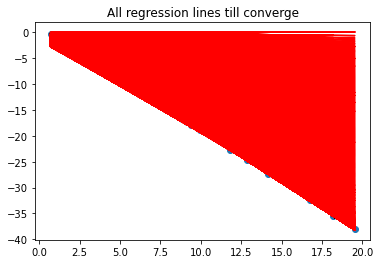

In [26]:
hlist_plot(x,h_list)

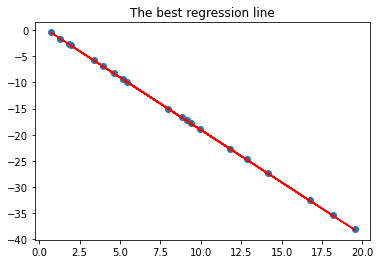

In [27]:
besth(x,y,h)

# When Alpha = 0.1

In [28]:
h,t0,t1,t0_list,t1_list,loss_f,h_list = batch_Rms(x,y,0.9,a=0.1,iteration = 1000)

In [29]:
R2(y,h)

0.9976427170493748

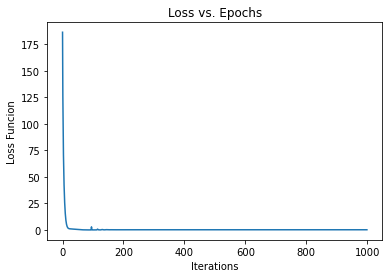

In [30]:
loss_plot(loss_f)

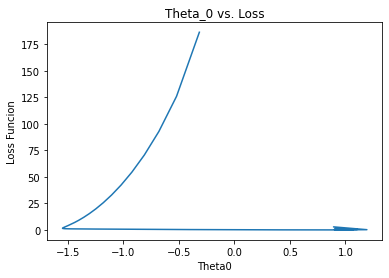

In [31]:
t0_plot(t0_list,loss_f)

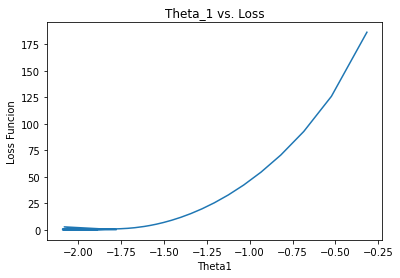

In [32]:
t1_plot(t1_list,loss_f)

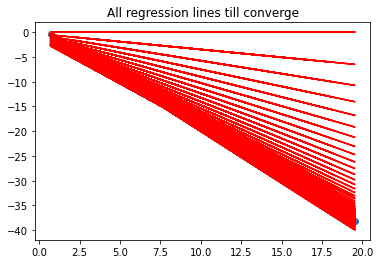

In [33]:
hlist_plot(x,h_list)

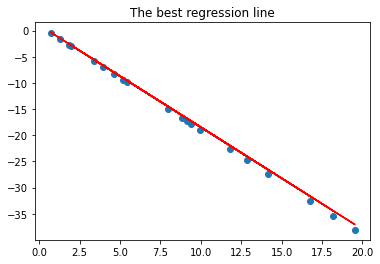

In [34]:
besth(x,y,h)

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

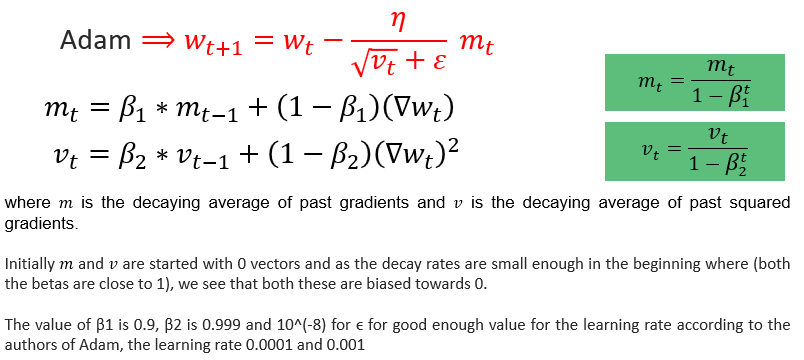

In [35]:
def batch_Adam(x,y,beta1,beta2,a=0.01,iteration = 1000):
    alpha = a
    epslon = 0.00000001
    t0 = 0
    t1 = 0 
    v0=0
    v1=0
    m0=0
    m1=0
    loss_f = []
    t0_list = []
    t1_list = []
    h_list = []
    
    for i in range(iteration):
        h = t0 + t1 *x
        h_list.append(h)
        cost_f = (sum((h-y)**2)/(2*len(x)))
        loss_f.append(cost_f)
        G0 = 1/len(x) * sum((h-y))
        G1 = sum((h-y)*x)/len(x)
        v0 = beta1*v0 + (1-beta1)*(G0**2)
        v1 = beta1*v1 + (1-beta1)*(G1**2)
        m0 = beta2*m0 + (1-beta2)*(G0)
        m1 = beta2*m1 + (1-beta2)*(G1)
        t0 = t0 - ((alpha/((v0**(1/2))+epslon))*m0)
        t0_list.append(t0)
        t1 = t1 - ((alpha/((v1**(1/2))+epslon))*m1)
        t1_list.append(t1)
        
    return h,t0,t1,t0_list,t1_list,loss_f,h_list


In [36]:
h,t0,t1,t0_list,t1_list,loss_f,h_list = batch_Adam(x,y,0.9,0.9,a=0.01,iteration = 1000)

In [37]:
R2(y,h)

0.9999998329406012

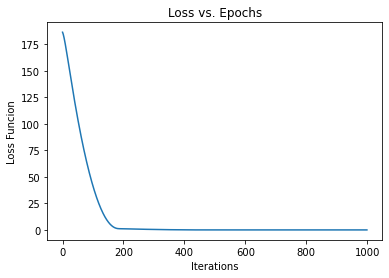

In [38]:
loss_plot(loss_f)

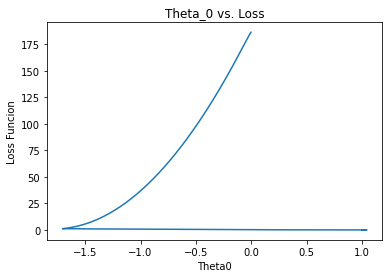

In [39]:
t0_plot(t0_list,loss_f)

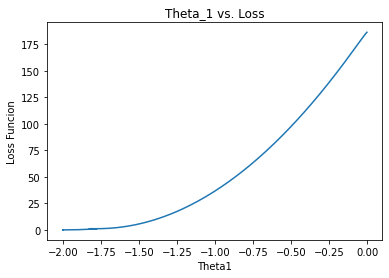

In [40]:
t1_plot(t1_list,loss_f)

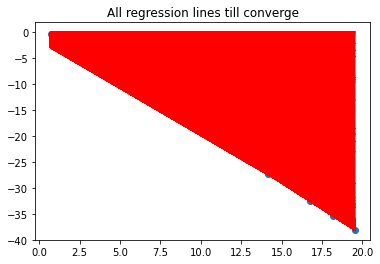

In [41]:
hlist_plot(x,h_list)

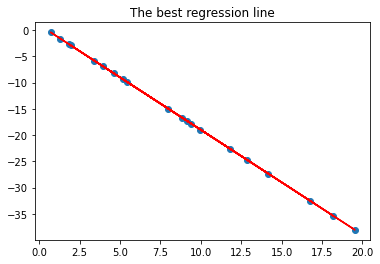

In [42]:
besth(x,y,h)

# When Alpha = 0.1

In [43]:
h,t0,t1,t0_list,t1_list,loss_f,h_list = batch_Adam(x,y,0.9,0.9,a=0.1,iteration = 1000)

In [44]:
R2(y,h)

0.999998042098407

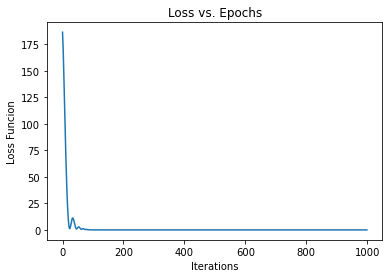

In [45]:
loss_plot(loss_f)

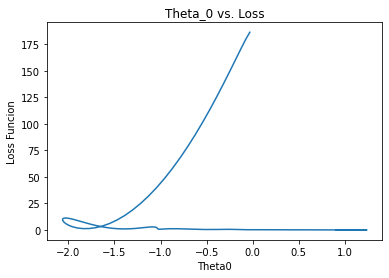

In [46]:
t0_plot(t0_list,loss_f)

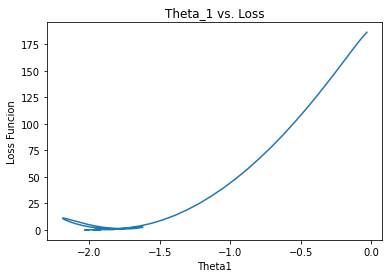

In [47]:
t1_plot(t1_list,loss_f)

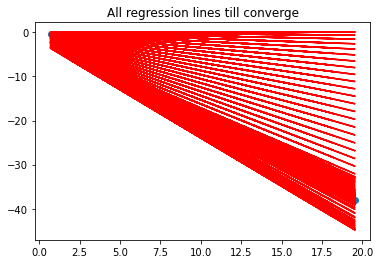

In [48]:
hlist_plot(x,h_list)

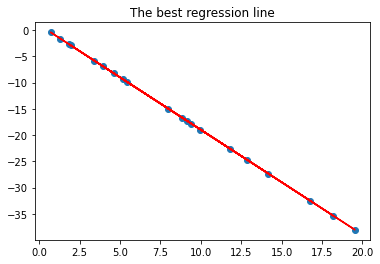

In [49]:
besth(x,y,h)